In [1]:
#load libraries
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sodapy import Socrata

# increase the size and quality of any plots we produce
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300

In [2]:
covid_df = pd.read_csv("data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv", low_memory = False)

In [3]:
covid_df.columns #column names

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')

In [26]:
covid_df.dtypes

date                        datetime64[ns]
state                               object
state_fips_code                      int64
county                              object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

In [5]:
covid_df.shape

(3068197, 19)

In [21]:
#data cleaning
covid_df["date"] = pd.to_datetime(covid_df["date"]) #convert to date

In [7]:
# dropping irrelevant columns
covid_df = covid_df.drop(columns=["case_positive_specimen_interval", "case_onset_interval", "process", "exposure_yn", "current_status"])

In [8]:
# rename cols for readability and uniformify across datasets
covid_rename = {"case_month":"date", "res_state":"state",
               "res_county":"county"}

covid_df = covid_df.rename(columns=covid_rename)

In [25]:
# converting data types 
to_str = ["state", "county", "age_group", "sex", "race", "ethnicity",
          "symptom_status", "hosp_yn", "icu_yn", "death_yn", "underlying_conditions_yn"]
covid_df[to_str] = covid_df[to_str].astype(str)

In [29]:
# show cols with NaNs
covid_df.columns[covid_df.isnull().any()]

Index([], dtype='object')

In [28]:
# fill NaNs in county_fips_code with "Not Available"
covid_df["county_fips_code"] = covid_df["county_fips_code"].fillna("Not Available")

In [45]:
# shows all values within the race col
covid_df.race.unique()

# rename nan, Missing, and Unknown to Not Available
rename_covid_nan = {"nan":"Not Available",
                     "Missing":"Not Available",
                     "Unknown":"Not Available"}
covid_df["race"] = covid_df["race"].replace(rename_covid_nan).astype(str)

In [46]:
# same treatment for ethnicity as the race col
covid_df.ethnicity.unique()

covid_df["ethnicity"] = covid_df["ethnicity"].replace(rename_covid_nan).astype(str)

In [56]:
covid_df["county"] = covid_df["county"].replace({"nan":"Not Available"})

# checking for NaN string values and replace with "Not Available" in remaining cols
covid_df.age_group.unique()
covid_df["age_group"] = covid_df["age_group"].replace({"nan":"Not Available", "Missing":"Not Available"}).astype(str)

covid_df["sex"] = covid_df["sex"].replace(rename_covid_nan).astype(str)

covid_df["death_yn"] = covid_df["death_yn"].replace(rename_covid_nan).astype(str)

covid_df["underlying_conditions_yn"] = covid_df["underlying_conditions_yn"].replace(rename_covid_nan).astype(str)

In [58]:
rename_missing_unk = {"Missing":"Not Available",
                      "Unknown":"Not Available"}
rename_col = ["symptom_status", "hosp_yn", "icu_yn"]
covid_df[rename_col] = covid_df[rename_col].replace(rename_missing_unk).astype(str)

In [61]:
covid_df.sample(10, random_state = 42)

,date,state,state_fips_code,county,county_fips_code,age_group,sex,race,ethnicity,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
3035816,2021-01-01,NY,36,KINGS,36047.0,50 to 64 years,Female,White,Non-Hispanic/Latino,Symptomatic,Not Available,Not Available,Not Available,Not Available
353013,2021-12-01,NY,36,CHENANGO,36017.0,18 to 49 years,Male,White,Non-Hispanic/Latino,Not Available,Not Available,Not Available,No,Not Available
2447365,2020-04-01,NY,36,NEW YORK,36061.0,65+ years,Male,White,Not Available,Not Available,Yes,Not Available,Not Available,Yes
1300224,2021-02-01,NY,36,KINGS,36047.0,18 to 49 years,Female,White,Non-Hispanic/Latino,Symptomatic,Not Available,Not Available,Not Available,Not Available
658764,2020-09-01,NY,36,CHAUTAUQUA,36013.0,65+ years,Female,Not Available,Not Available,Not Available,Not Available,Not Available,No,Not Available
2463926,2021-02-01,NY,36,QUEENS,36081.0,18 to 49 years,Male,Not Available,Hispanic/Latino,Symptomatic,Not Available,Not Available,Not Available,Not Available
438541,2021-01-01,NY,36,SCHENECTADY,36093.0,50 to 64 years,Female,White,Not Available,Symptomatic,No,Not Available,No,Not Available
1242710,2021-02-01,NY,36,ERIE,36029.0,18 to 49 years,Female,White,Non-Hispanic/Latino,Symptomatic,No,Not Available,No,Not Available
2580841,2021-01-01,NY,36,QUEENS,36081.0,65+ years,Female,Asian,Non-Hispanic/Latino,Not Available,Not Available,Not Available,Not Available,Yes
1217306,2021-08-01,NY,36,RICHMOND,36085.0,0 - 17 years,Male,Not Available,Not Available,Symptomatic,Not Available,Not Available,Not Available,Not Available


In [62]:
covid_df.describe(include = 'all',datetime_is_numeric=True) #describe and include string columns

,date,state,state_fips_code,county,county_fips_code,age_group,sex,race,ethnicity,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
count,3068197,3068197,3068197.0,3068197,3068197.0,3068197,3068197,3068197,3068197,3068197,3068197,3068197,3068197,3068197
unique,NaN,1,NaN,60,60.0,5,3,7,3,3,3,3,3,3
top,NaN,NY,NaN,KINGS,36047.0,18 to 49 years,Female,Not Available,Not Available,Not Available,Not Available,Not Available,No,Not Available
freq,NaN,3068197,NaN,393598,393598.0,1591113,1565104,1465777,1781160,1872146,2481857,3033949,1607526,2702595
mean,2021-01-26 14:13:51.516097536,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2020-01-01 00:00:00,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2020-10-01 00:00:00,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-01-01 00:00:00,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-08-01 00:00:00,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021-12-01 00:00:00,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


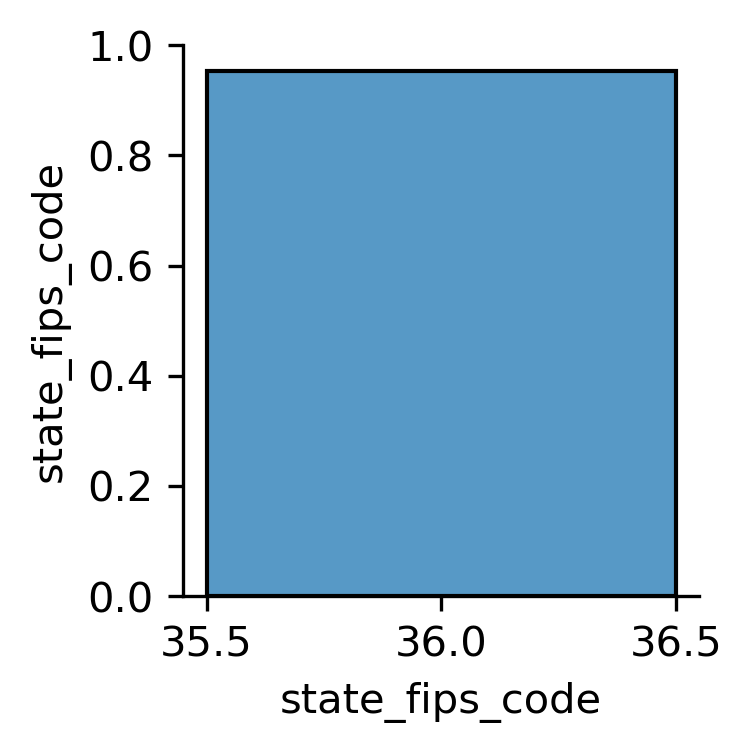

In [63]:
sns.pairplot(covid_df)

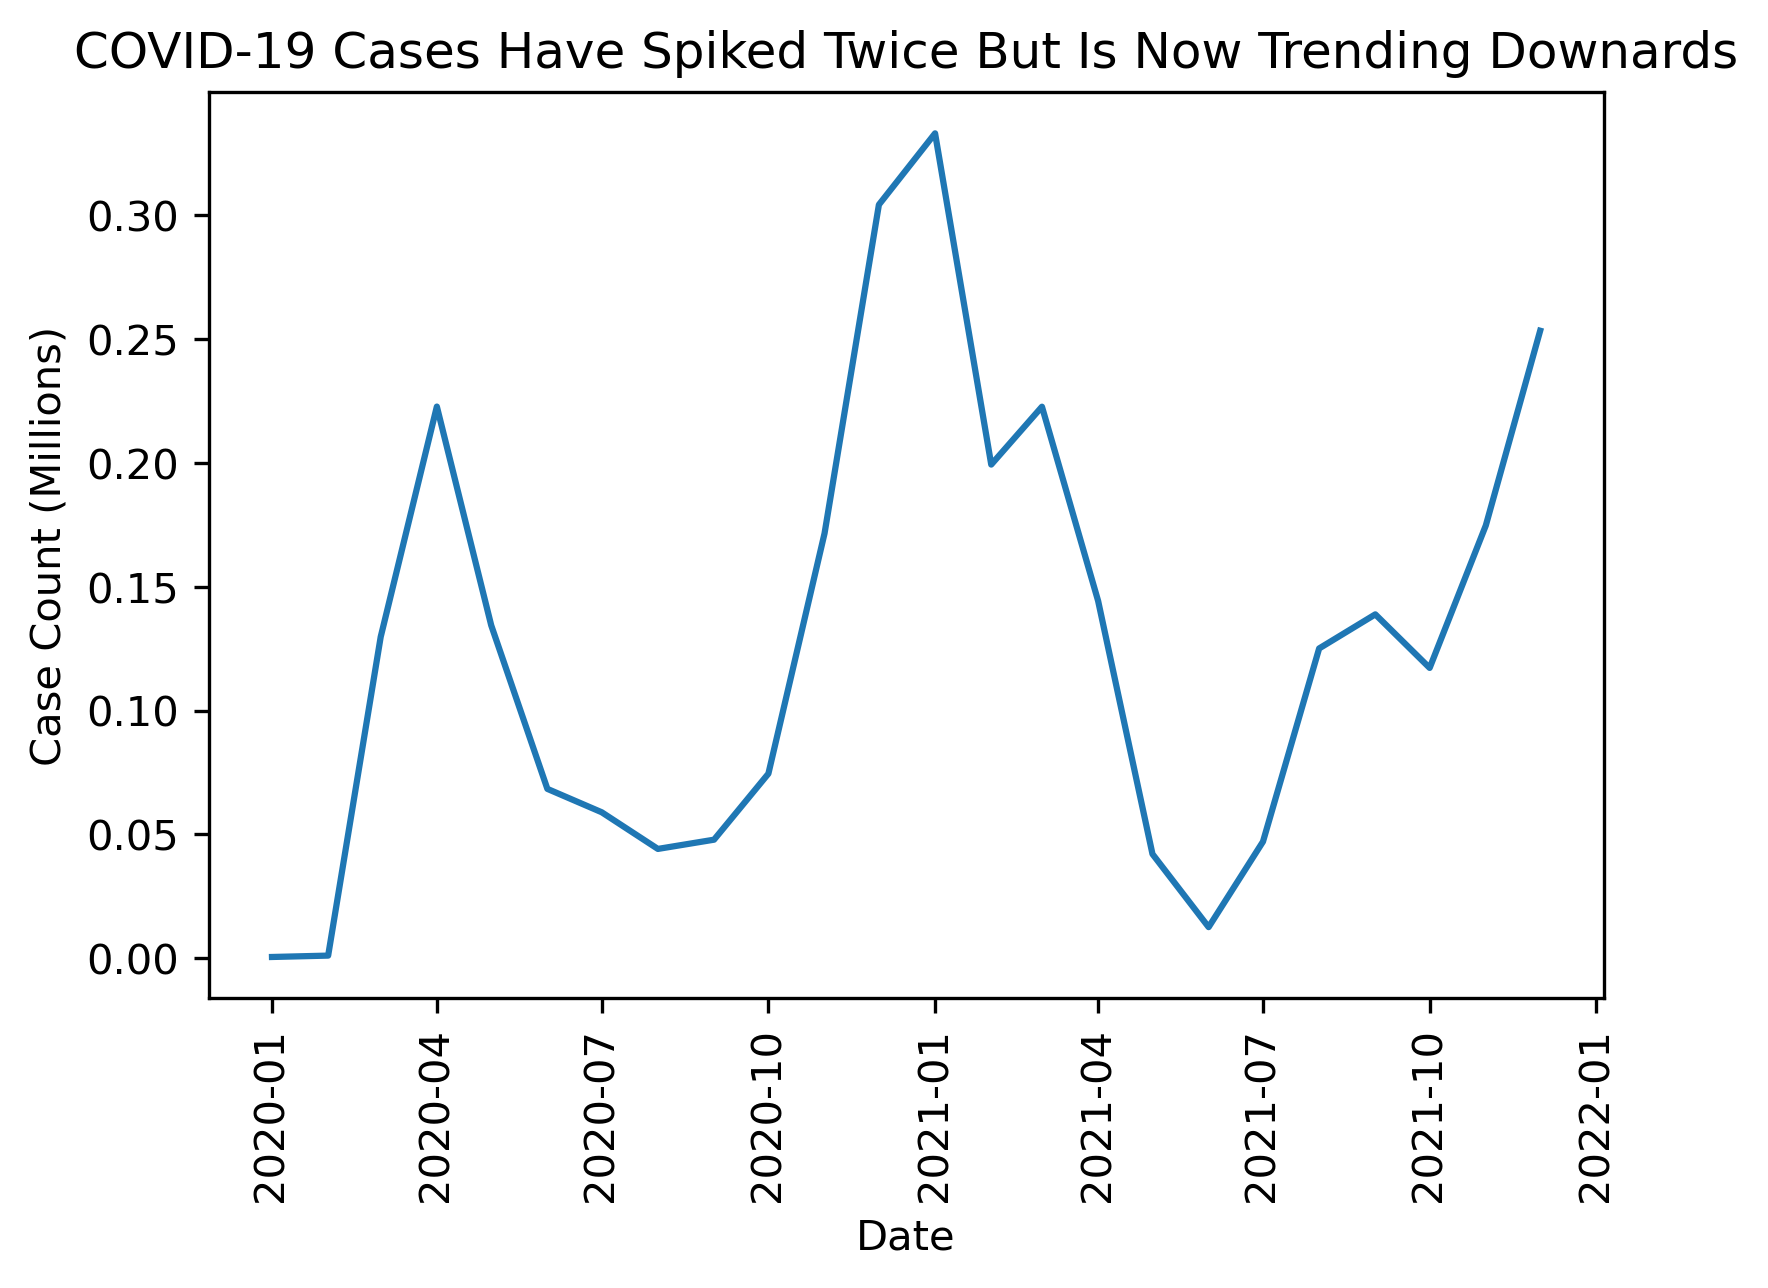

In [77]:
#covid cases trend
trend_df = covid_df.groupby(['date']).size().reset_index(name = 'case_count').set_index('date')
trend_df['case_count_millions'] = trend_df['case_count']/1000000
plt.plot(trend_df.index,trend_df['case_count_millions'])
plt.title('COVID-19 Cases Have Spiked Twice But Is Now Trending Downards')
plt.xlabel('Date')
plt.ylabel('Case Count (Millions)')
plt.xticks(rotation=90)
plt.show()

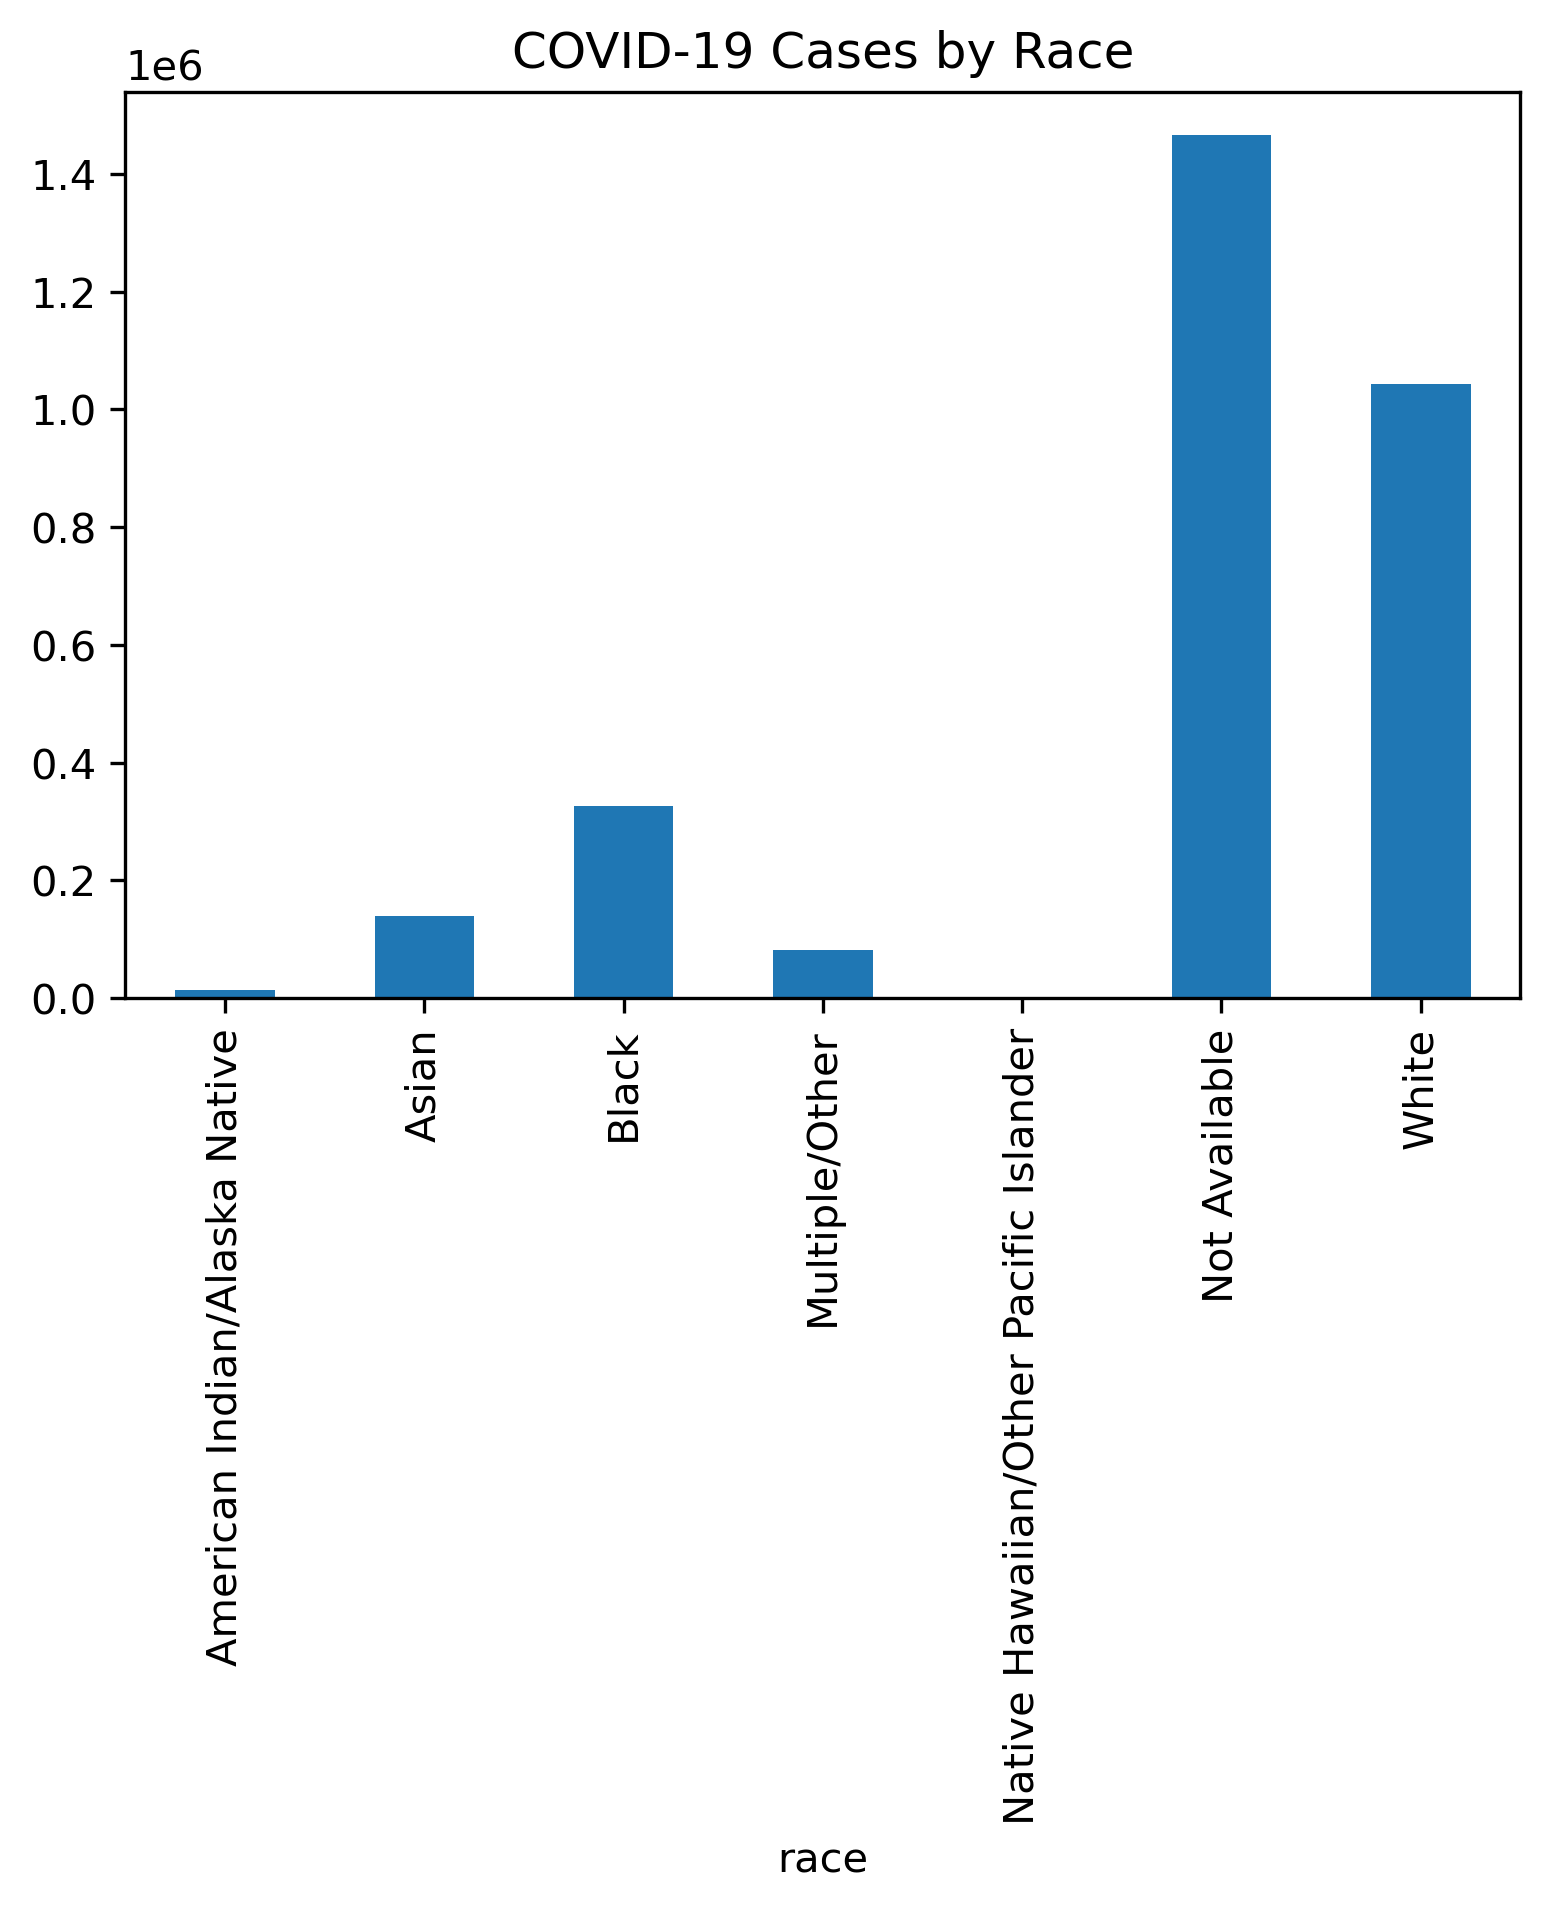

In [78]:
covid_df.groupby(['race']).size().plot.bar()
plt.title("COVID-19 Cases by Race")
plt.show()

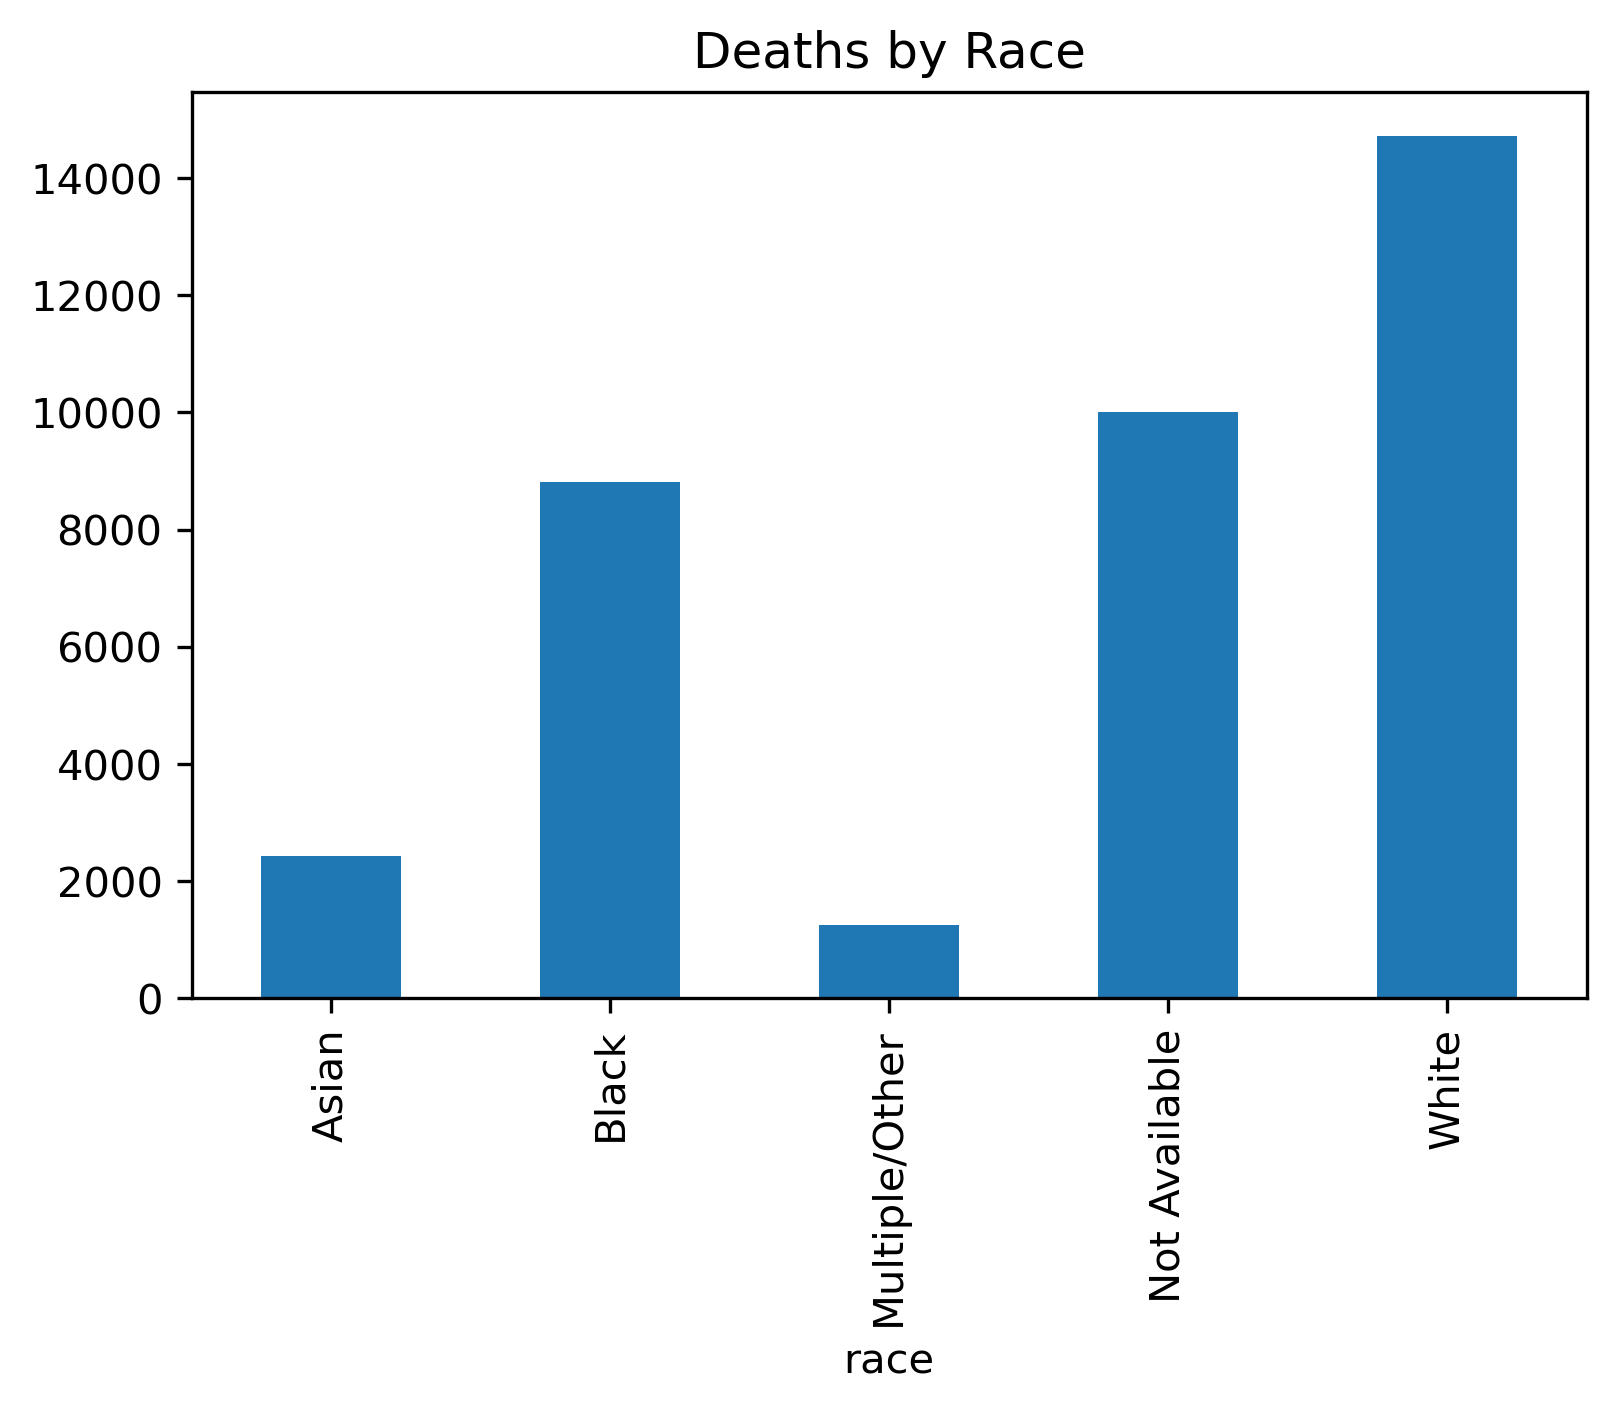

In [79]:
#death status per race
death_df = covid_df[covid_df['death_yn'] == 'Yes'] 
death_df.groupby(['race']).size().plot.bar()
plt.title("Deaths by Race")
plt.show()

In [68]:
#death status per state
death_df.groupby(['state']).size().reset_index(name = 'count')

,state,count
0,NY,37218


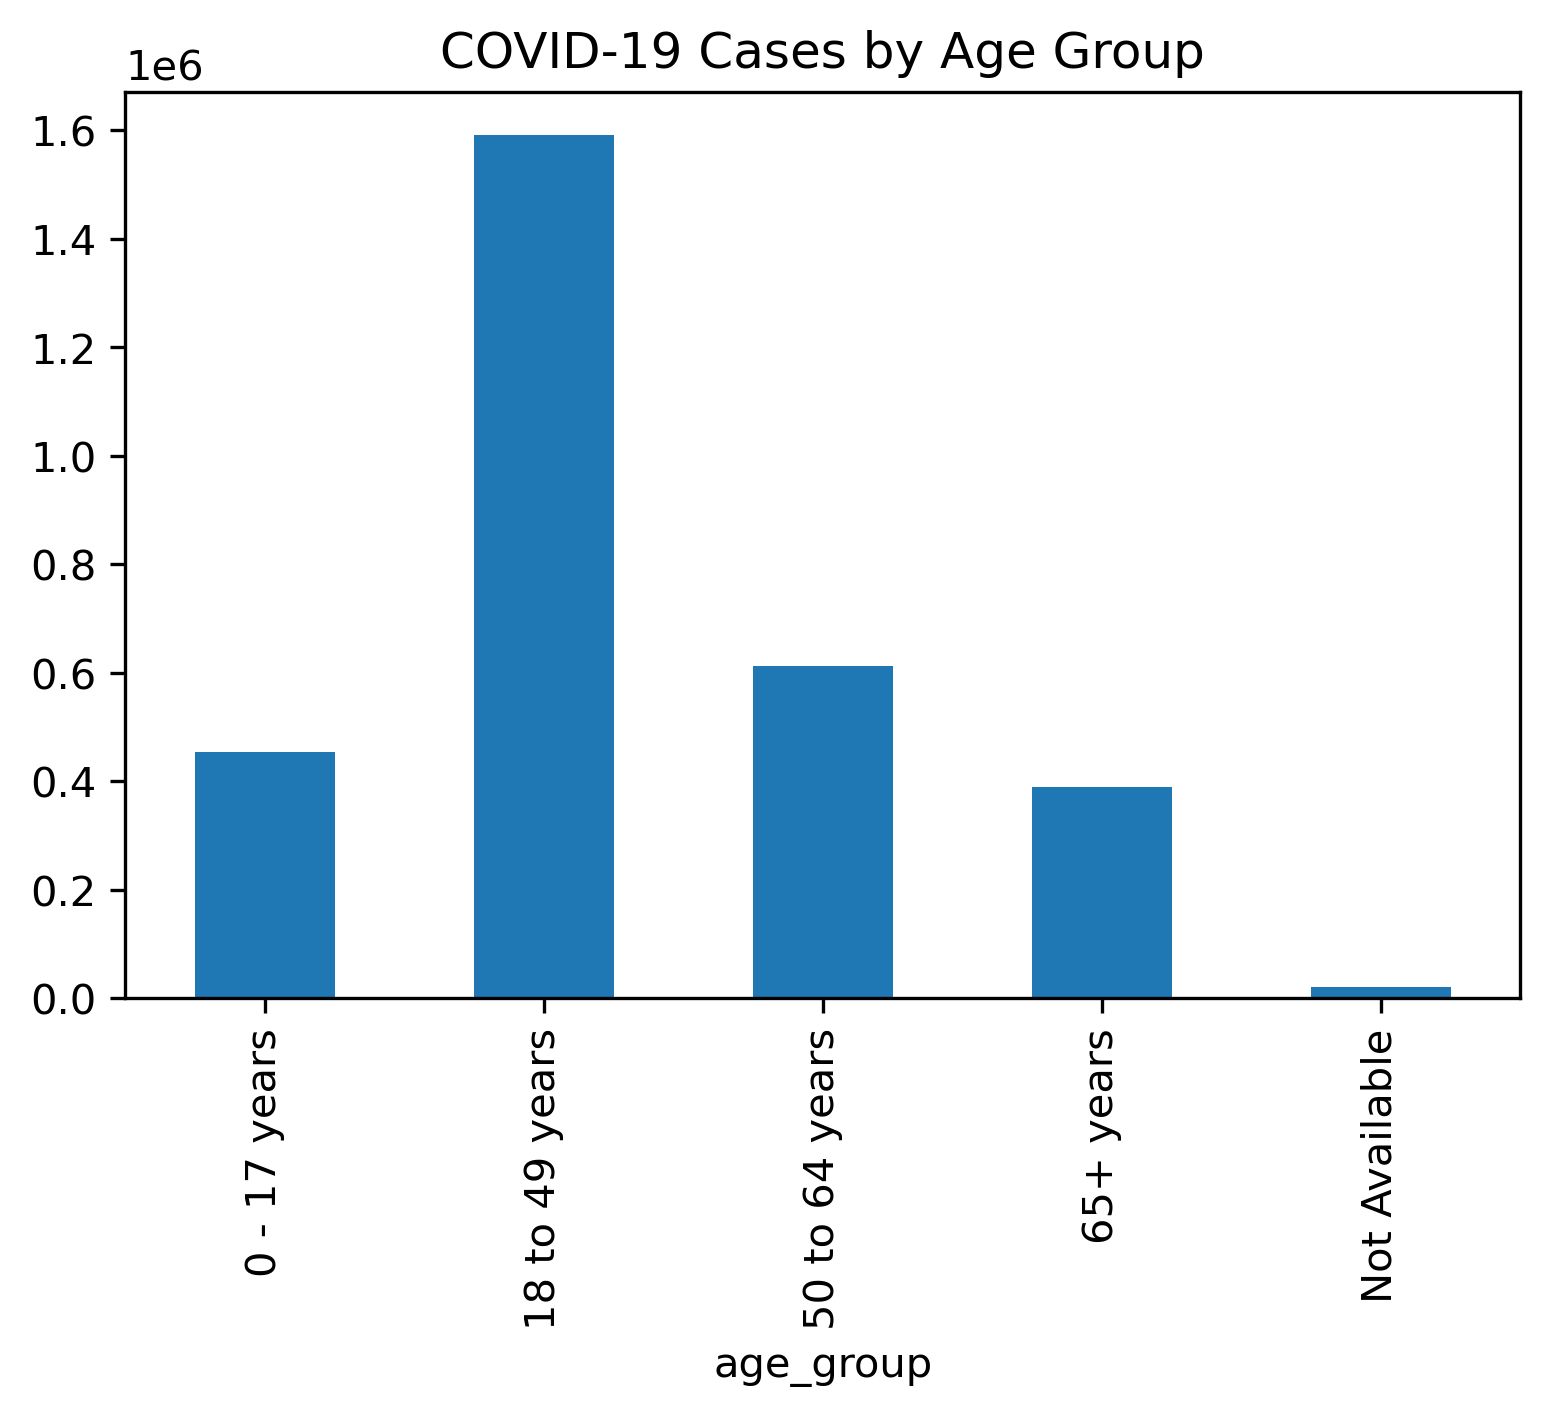

In [81]:
covid_df.groupby(["age_group"]).size().plot.bar()
plt.title("COVID-19 Cases by Age Group");